# PROJECT : LOAN ANALYSIS

#### 1 . Data Understanding
#### 2 . Data Cleaning
#### 3 . Data Analysis
#### 4 . Recommendation

In [1]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan.csv');
#df2 = pd.read_csv('Data_Dictionary.xls')

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Understanding

In [3]:
df.head(15)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The **target variable**, which we want to compare across the independent variables, is loan status. The strategy is to figure out compare the average default rates across various independent variables and identify the  ones that affect default rate the most.


In [5]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
5         Fully Paid
6         Fully Paid
7         Fully Paid
8        Charged Off
9        Charged Off
10        Fully Paid
11        Fully Paid
12       Charged Off
13        Fully Paid
14       Charged Off
15        Fully Paid
16        Fully Paid
17        Fully Paid
18        Fully Paid
19        Fully Paid
20        Fully Paid
21       Charged Off
22        Fully Paid
23        Fully Paid
24       Charged Off
25        Fully Paid
26       Charged Off
27       Charged Off
28        Fully Paid
29        Fully Paid
            ...     
39687     Fully Paid
39688    Charged Off
39689     Fully Paid
39690     Fully Paid
39691     Fully Paid
39692     Fully Paid
39693     Fully Paid
39694     Fully Paid
39695     Fully Paid
39696     Fully Paid
39697     Fully Paid
39698     Fully Paid
39699     Fully Paid
39700     Fully Paid
39701     Fully Paid
39702     Fully Paid
39703     Ful

## Data Cleaning

In [6]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
round(df.isnull().sum()/len(df.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


You can see that many columns have 100% missing values, some have 65%, 33% etc. First, let's get rid of the columns having 100% missing values.

In [8]:
df.shape

(39717, 111)

In [9]:
# removing the columns having more than 90% missing values
missing_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [10]:
df = df.drop(missing_columns, axis=1)
print(df.shape)

(39717, 55)


In [11]:
100*(df.isnull().sum()/len(df.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [12]:
# There are now 2 columns having approx 32 and 64% missing values - 
# description and months since last delinquent
df.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


The column description contains the comments the applicant had written while applying for the loan. Although one can use some text analysis techniques to derive new features from this column (such as sentiment, number of positive/negative words etc.), we will not use this column in this analysis. 

Secondly, months since last delinquent represents the number months passed since the person last fell into the 90 DPD group. There is an important reason we shouldn't use this column in analysis - since at the time of loan application, we will not have this data (it gets generated months after the loan has been approved), it cannot be used as a predictor of default at the time of loan approval. 

In [13]:
# dropping the two columns
df = df.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [14]:
100*(df.isnull().sum()/len(df.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

There are some more columns with missing values, but let's ignore them for now (since we are ntot doing any modeling, we don't need to impute all missing values anyway). 


In [15]:
df.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [16]:
# checking whether some rows have more than 5 missing values
len(df[df.isnull().sum(axis=1) > 5].index)

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [18]:
df['int_rate'].head(10)

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
5     7.90%
6    15.96%
7    18.64%
8    21.28%
9    12.69%
Name: int_rate, dtype: object

In [19]:
# The column int_rate is character type, let's convert it to float
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [20]:
df['int_rate'].head(10)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
5     7.90
6    15.96
7    18.64
8    21.28
9    12.69
Name: int_rate, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [22]:
# also, lets extract the numeric part from the variable employment length
# first, let's drop the missing values from the column (otherwise the regex code below throws error)
df = df[~df['emp_length'].isnull()]

In [23]:
df['emp_length'].head(10)

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
5      3 years
6      8 years
7      9 years
8      4 years
9     < 1 year
Name: emp_length, dtype: object

In [24]:
# using regular expression to extract numeric values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

In [25]:
df['emp_length'].head(10)

0    10
1     1
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     1
Name: emp_length, dtype: object

In [26]:
# convert to numeric
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

## Data Analysis

Let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. 

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

In [28]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [29]:
# let's now remove the behaviour variables from analysis
df = df.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

In [30]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [31]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [32]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [33]:
# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [34]:
# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

## Univariate Analysis

In [35]:
round(np.mean(df['loan_status']) , 2)

0.14

14% of overall default rate.

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


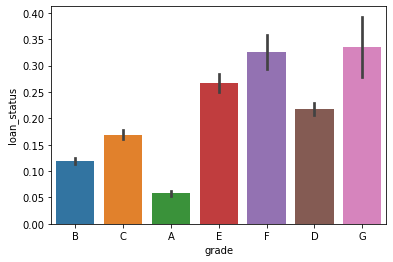

In [36]:
sns.barplot(x = 'grade' , y = 'loan_status' , data = df)
plt.show()

In [37]:
# make a function for ploting the graphs
def plot_cat(var):
    sns.barplot(x = var , y = 'loan_status' , data = df)
    plt.show()

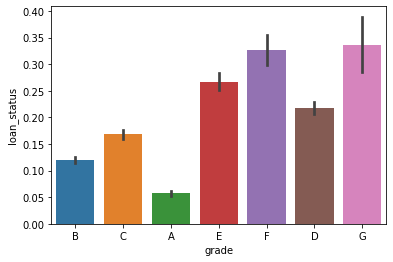

In [38]:
plot_cat('grade')

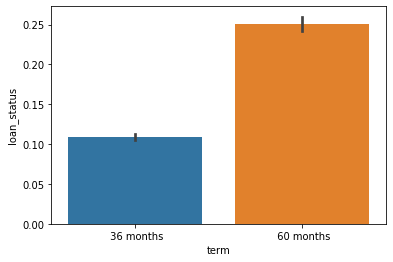

In [39]:
plot_cat('term')

Those who are long term loan payer they are defaulted much.

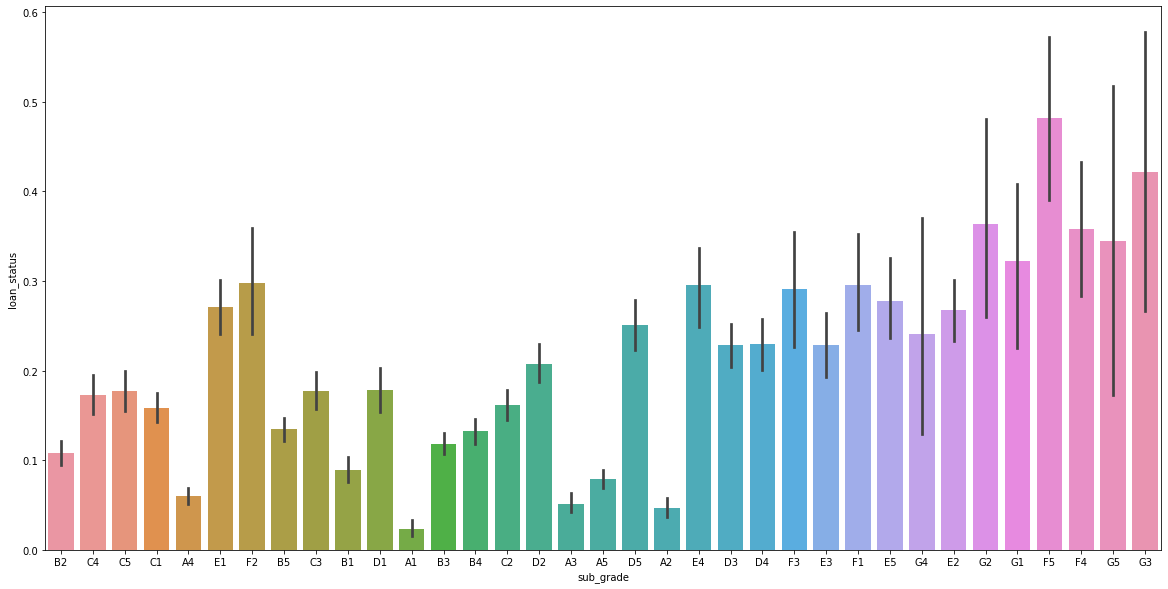

In [40]:
plt.figure(figsize = (20 , 10))
plot_cat('sub_grade')

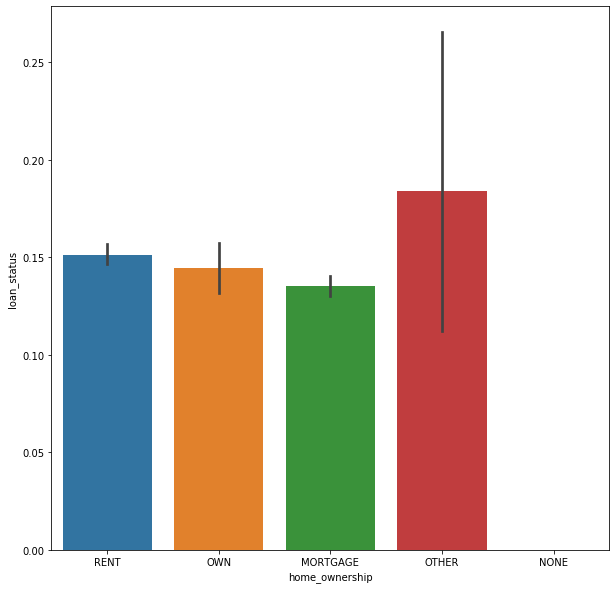

In [41]:
# home ownership
plt.figure(figsize = (10 , 10))
plot_cat('home_ownership')

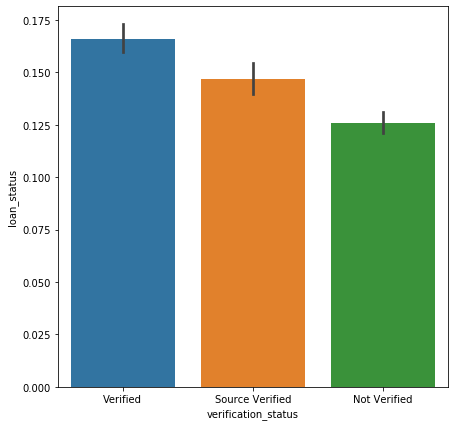

In [42]:
# varification status
plt.figure(figsize = (7 , 7))
plot_cat('verification_status')

The above graph clearly show that those who are verified customer they are defaulted much.

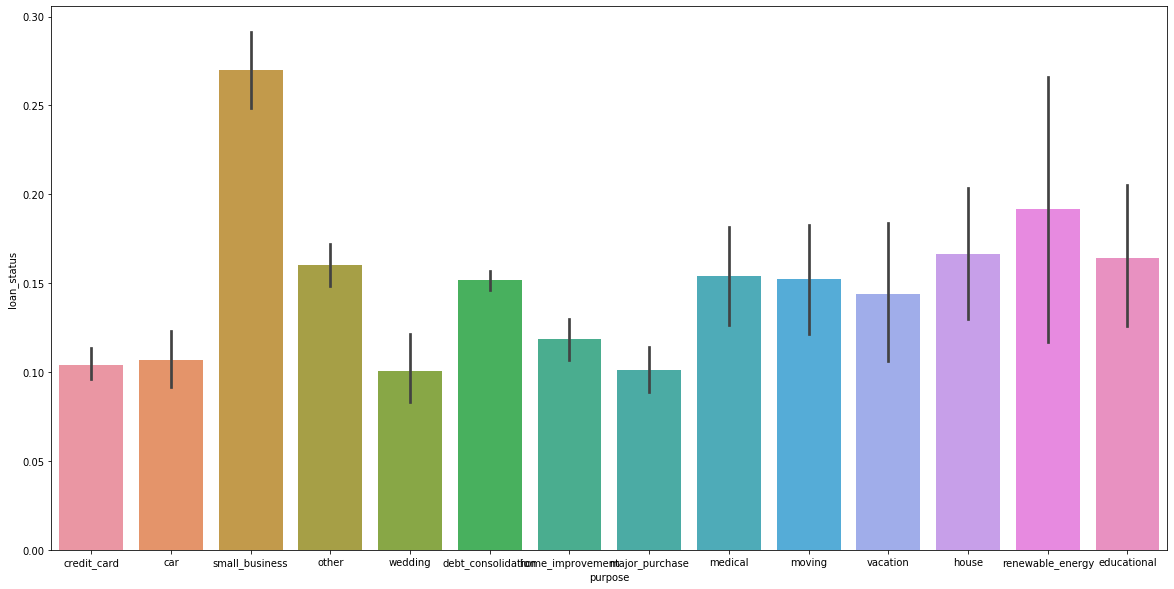

In [43]:
plt.figure(figsize = (20 , 10))
plot_cat('purpose')

The most risky customer are who are coming for starting small business.Some other like car,credit card wedding these have low risk probability.

In [44]:
# let's also observe the distribution of loans across years
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [45]:
from datetime import datetime

df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x , '%b-%y'))
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [46]:
# Extracting year and month from datetime
df['year'] = df['issue_d'].apply(lambda x: x.year)
df['month'] = df['issue_d'].apply(lambda x: x.month)

In [47]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,f,0.0,1,0,0.0,0,0.0,0.0,2011,12


In [48]:
# let's first observe the number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [49]:
# let's first observe the number of loans granted across years
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

In 2011 the company give highest amount of  and every year in December the company give loan much then other month.

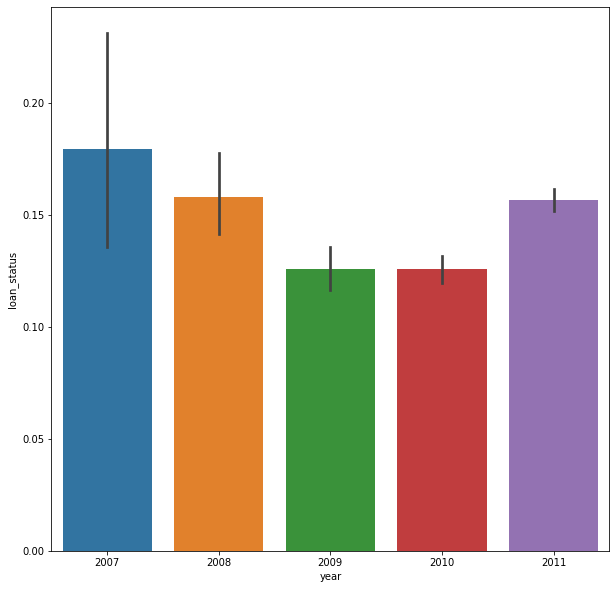

In [50]:
# plot graph of year
plt.figure(figsize = (10 , 10))
plot_cat('year')

In here 2007 is the most loan giving year and it decrese year by year.But in 2011 it again increse.

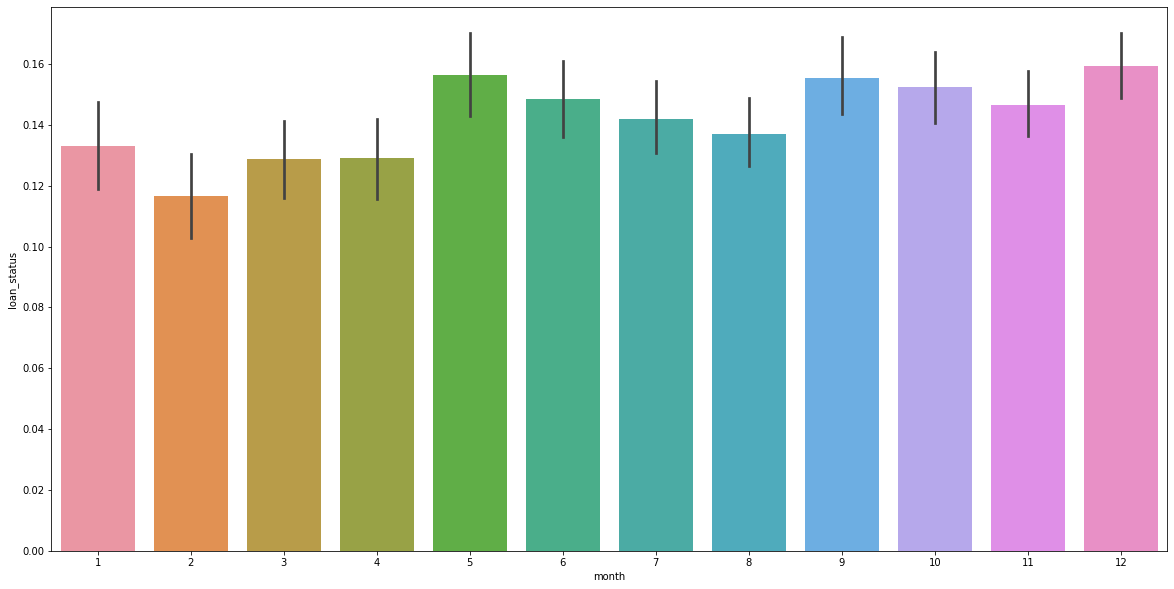

In [51]:
# plot graph of month
plt.figure(figsize = (20 , 10))
plot_cat('month')

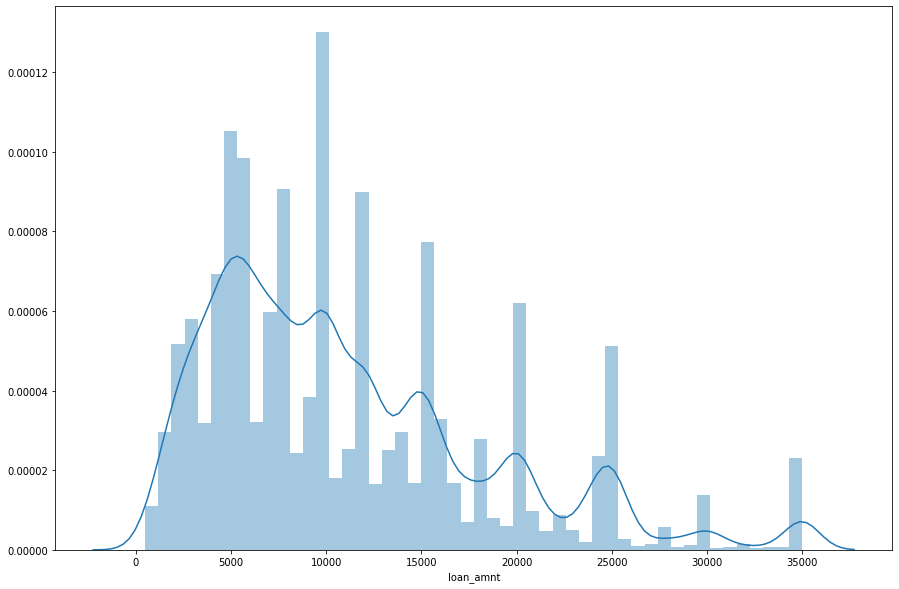

In [52]:
# loan amount: the median loan amount is around 10,000
plt.figure(figsize = (15 , 10))
sns.distplot(df['loan_amnt'])
plt.show()

It is hard to find out the desired answer from numeric value.So convert this into 4 major part low , medium , high , very_high

In [53]:
def divide_loan(div):
    if div < 5000:
        return 'low'
    
    elif div >= 5000 and div < 15000:
        return 'medium'
    
    elif div >= 15000 and div < 25000:
        return 'high'
    
    else:
        return 'very high'

In [54]:
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: divide_loan(x))

In [55]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

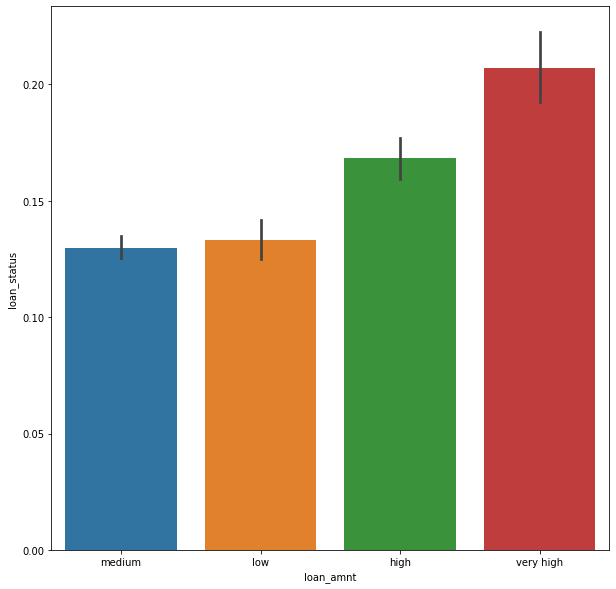

In [56]:
# let's compare the default rates across loan amount type
plt.figure(figsize = (10 , 10))
plot_cat('loan_amnt')

very high amount have much risk.

In [57]:
# let's also convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: divide_loan(x))

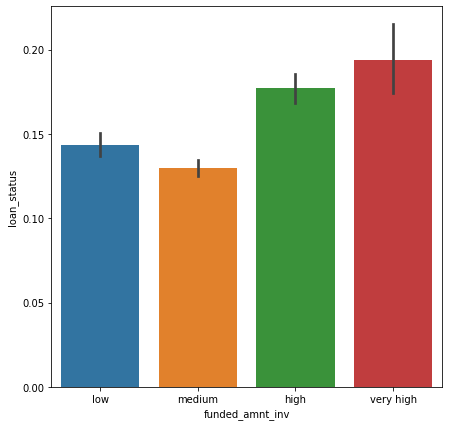

In [58]:
plt.figure(figsize = (7 , 7))
plot_cat('funded_amnt_inv')

In [59]:
# lets also convert interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    
    elif n > 10 and n <=15:
        return 'medium'
    
    else:
        return 'high'

In [60]:
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

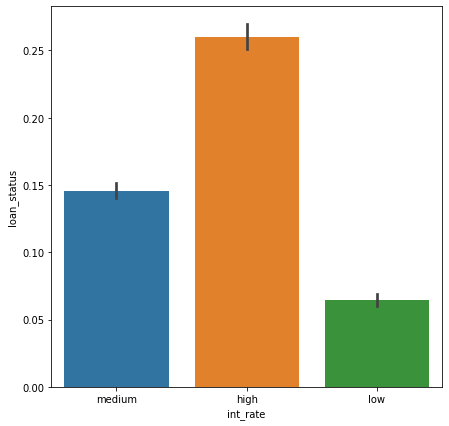

In [61]:
plt.figure(figsize = (7 , 7))
plot_cat('int_rate')

#### People who are giving high interest they are defaulted much.

In [62]:
# debt to income ratio
def income_ratio(n):
    if n <= 10:
        return 'low'
    
    elif n > 10 and n <=20:
        return 'medium'
    
    else:
        return 'high'

In [63]:
df['dti'] = df['dti'].apply(lambda x: income_ratio(x))

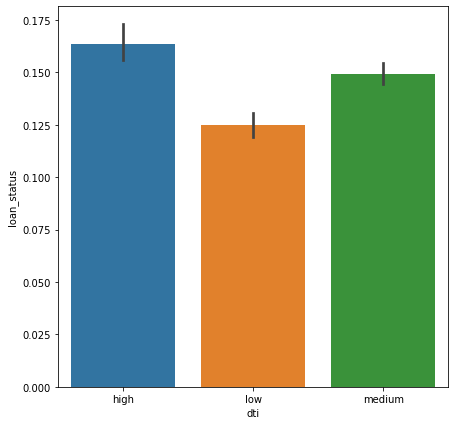

In [64]:
plt.figure(figsize = (7 , 7))
plot_cat('dti')

In [65]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    
    elif n > 5000 and n <=15000:
        return 'medium'
    
    else:
        return 'high'

In [66]:
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

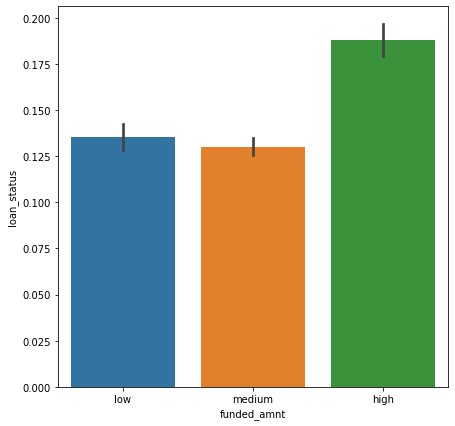

In [67]:
plt.figure(figsize = (7 , 7))
plot_cat('funded_amnt')

In [68]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    
    elif n > 200 and n <=400:
        return 'medium'
    
    elif n > 400 and n <=600:
        return 'high'
    
    else:
        return 'very high'

In [69]:
df['installment'] = df['installment'].apply(lambda x: installment(x))

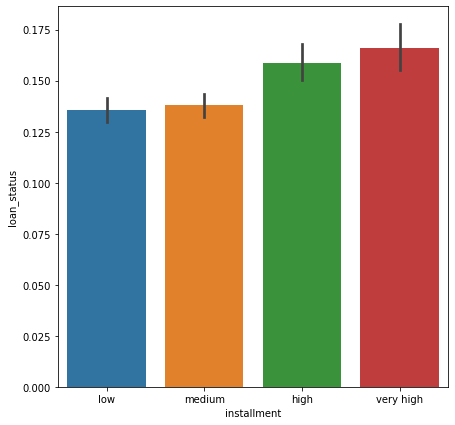

In [70]:
plt.figure(figsize = (7 , 7))
plot_cat('installment')

In [71]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

In [72]:
df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

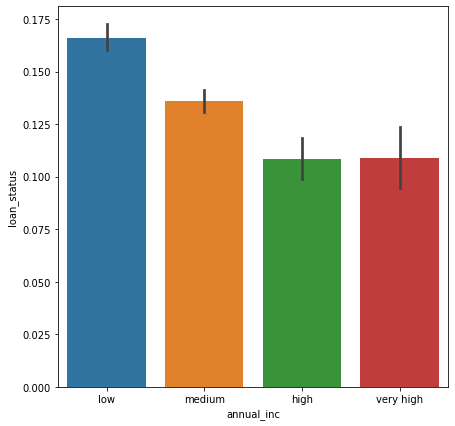

In [73]:
plt.figure(figsize = (7 , 7))
plot_cat('annual_inc')

In [74]:
# employment length
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]


def emp_length(n):
    if n <= 1:
        return 'fresher'
    
    elif n > 1 and n <=3:
        return 'junior'
    
    elif n > 3 and n <=7:
        return 'senior'
    
    else:
        return 'expert'

In [75]:
df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

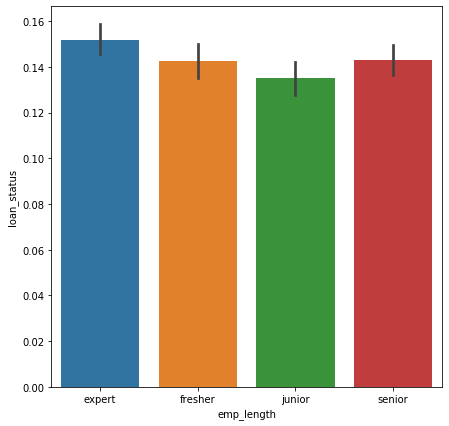

In [76]:
plt.figure(figsize = (7 , 7))
plot_cat('emp_length')

## Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc.

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.

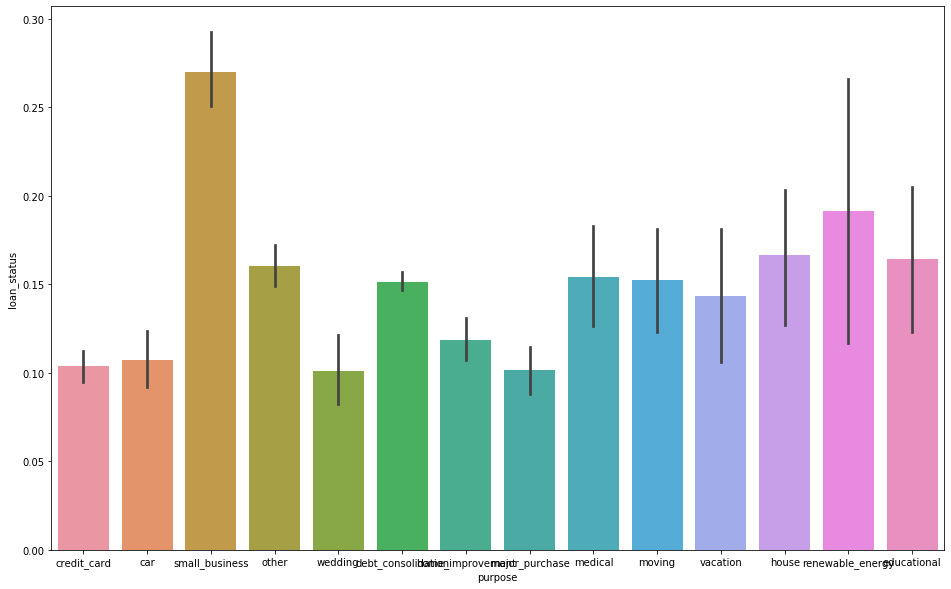

In [77]:
plt.figure(figsize=(16, 10))
plot_cat('purpose')

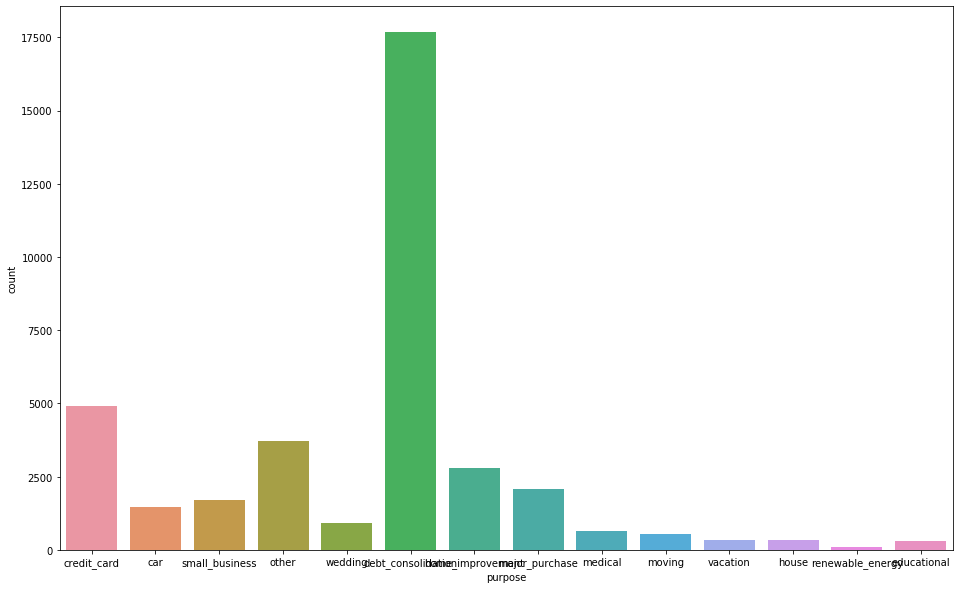

In [78]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 10))
sns.countplot(x='purpose', data=df)
plt.show()

In [79]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

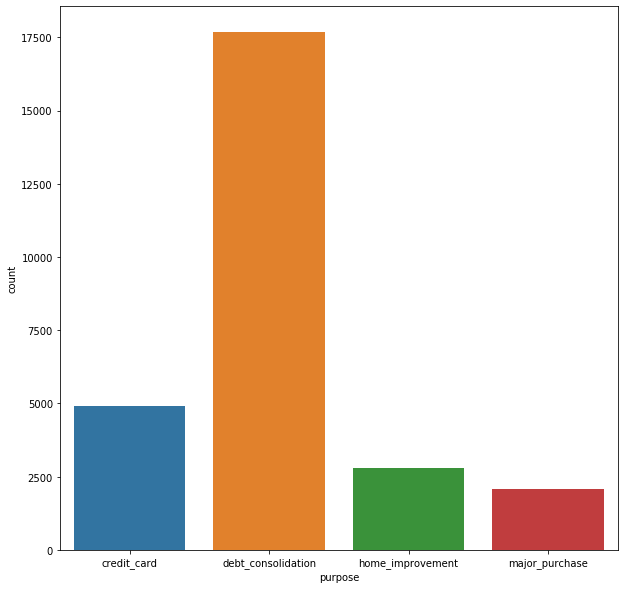

In [80]:
plt.figure(figsize=(10, 10))
sns.countplot(x=df['purpose'])
plt.show()

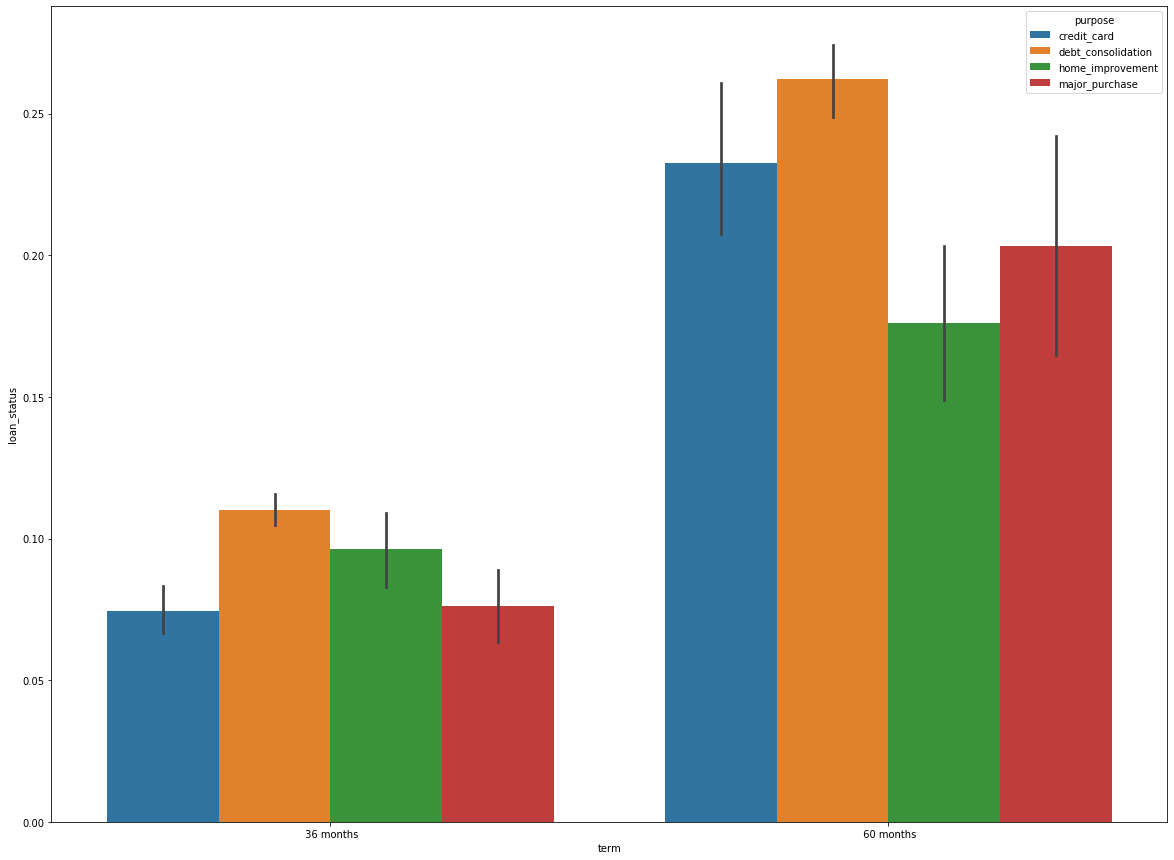

In [81]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[20 , 15])
sns.barplot(x = 'term' , y = "loan_status" , hue='purpose' , data = df)
plt.show()

In both short-term and long-term debt-consolidation is high.In 36 month home-improvement is high but in 60 month it is low.

In [82]:
# lets write a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=[20 , 15])
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

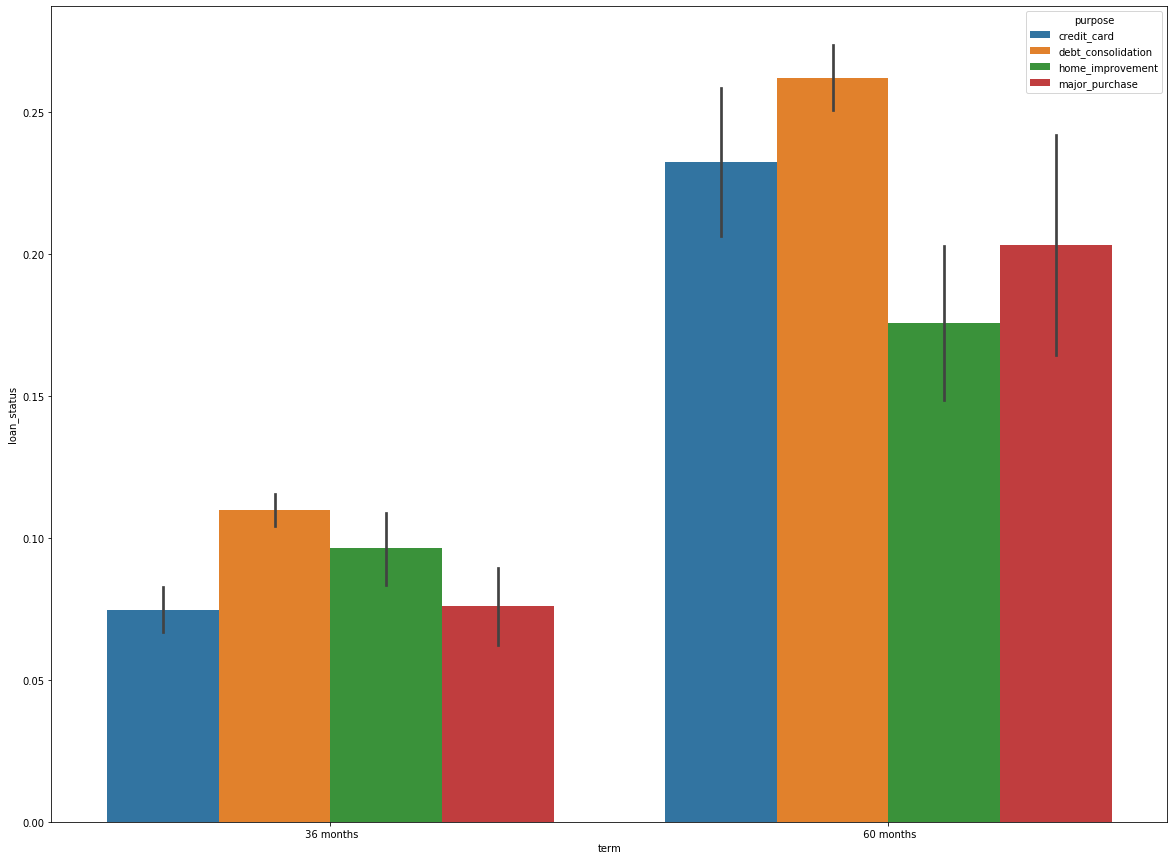

In [83]:
plot_segmented('term')

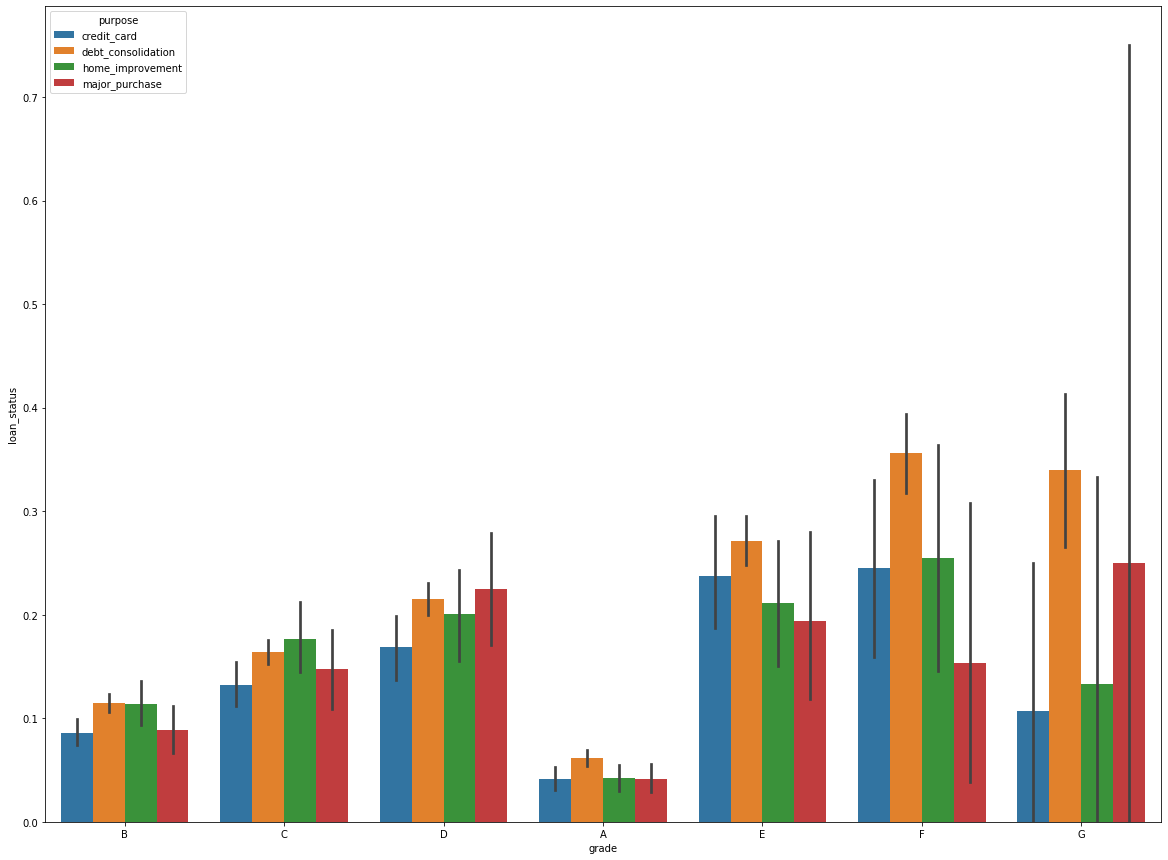

In [84]:
plot_segmented('grade')

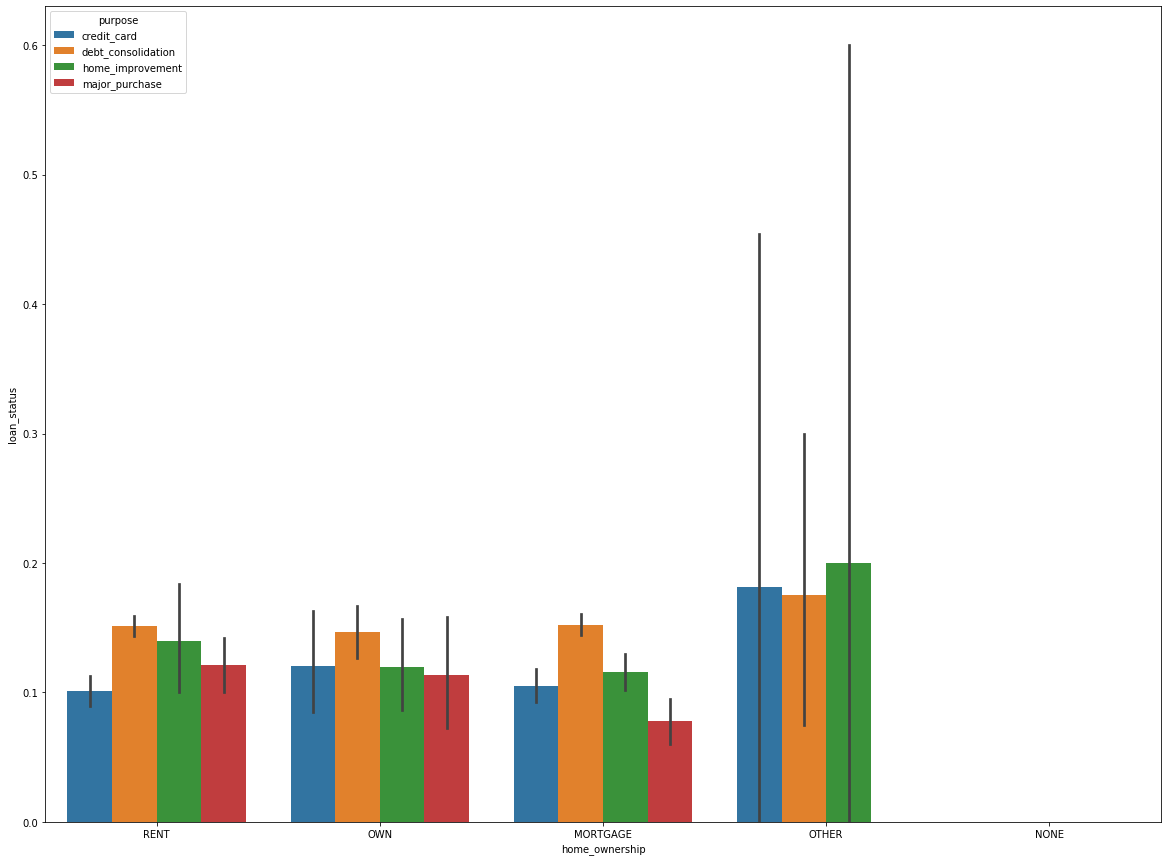

In [85]:
plot_segmented('home_ownership')

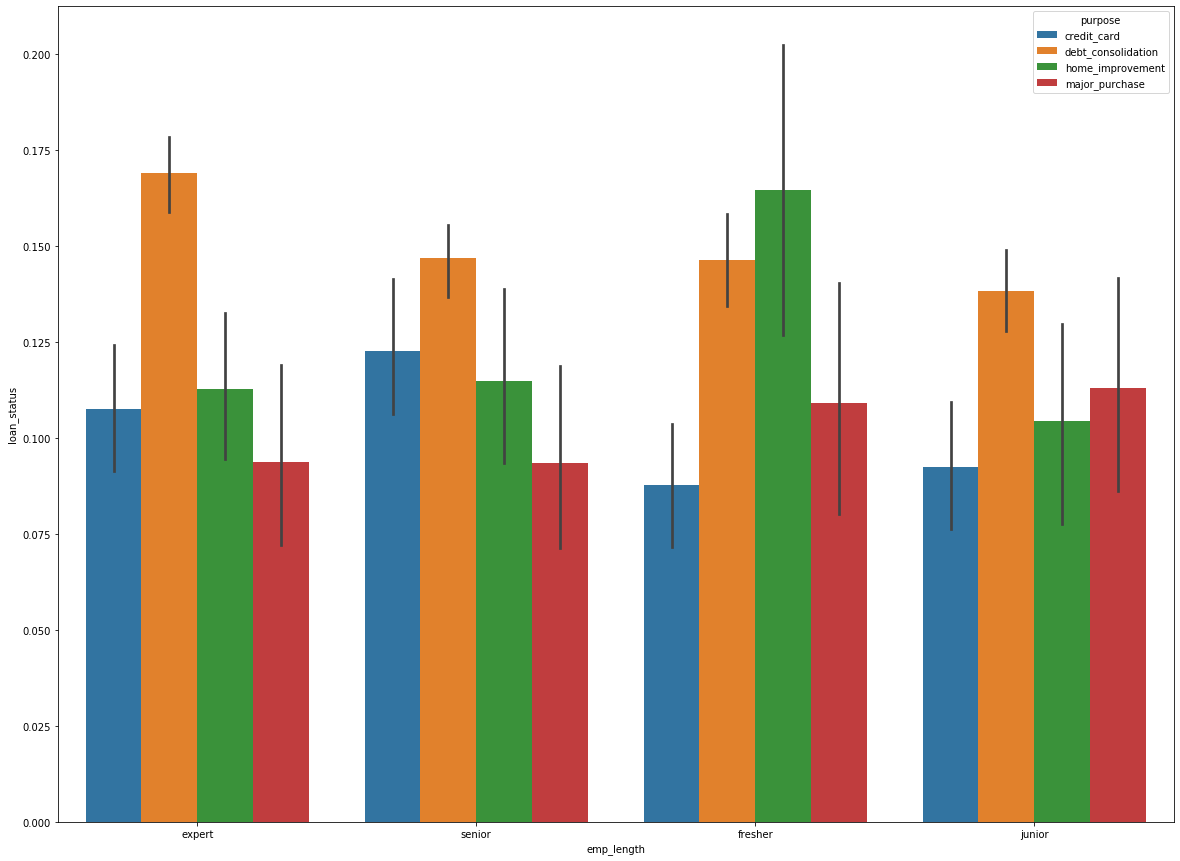

In [86]:
plot_segmented('emp_length')

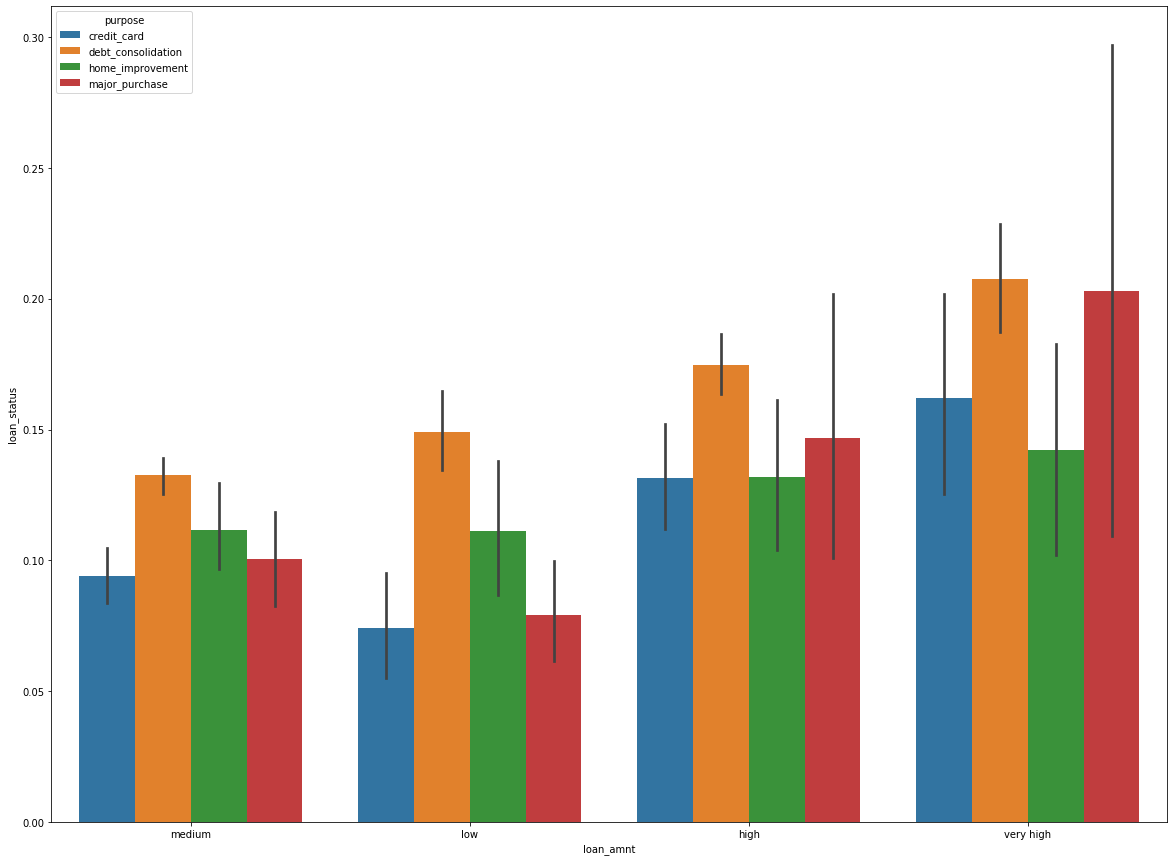

In [87]:
plot_segmented('loan_amnt')

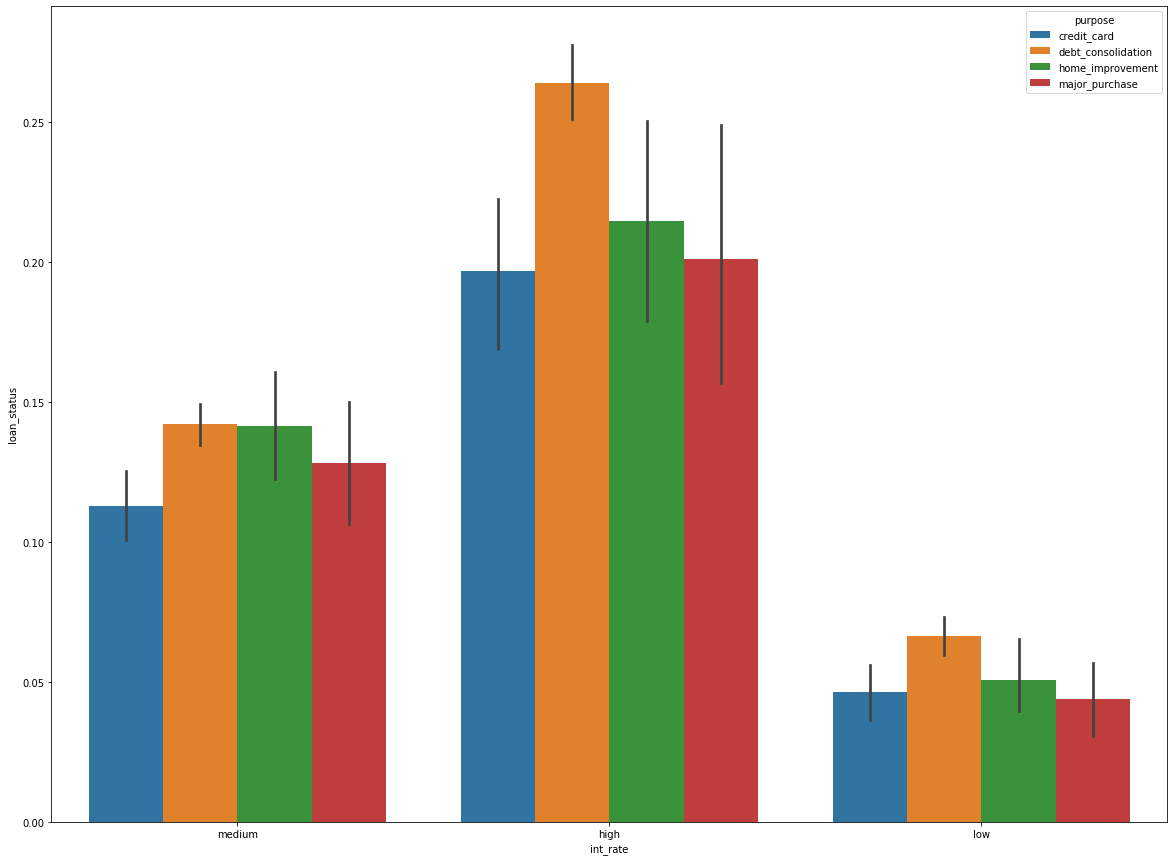

In [88]:
plot_segmented('int_rate')

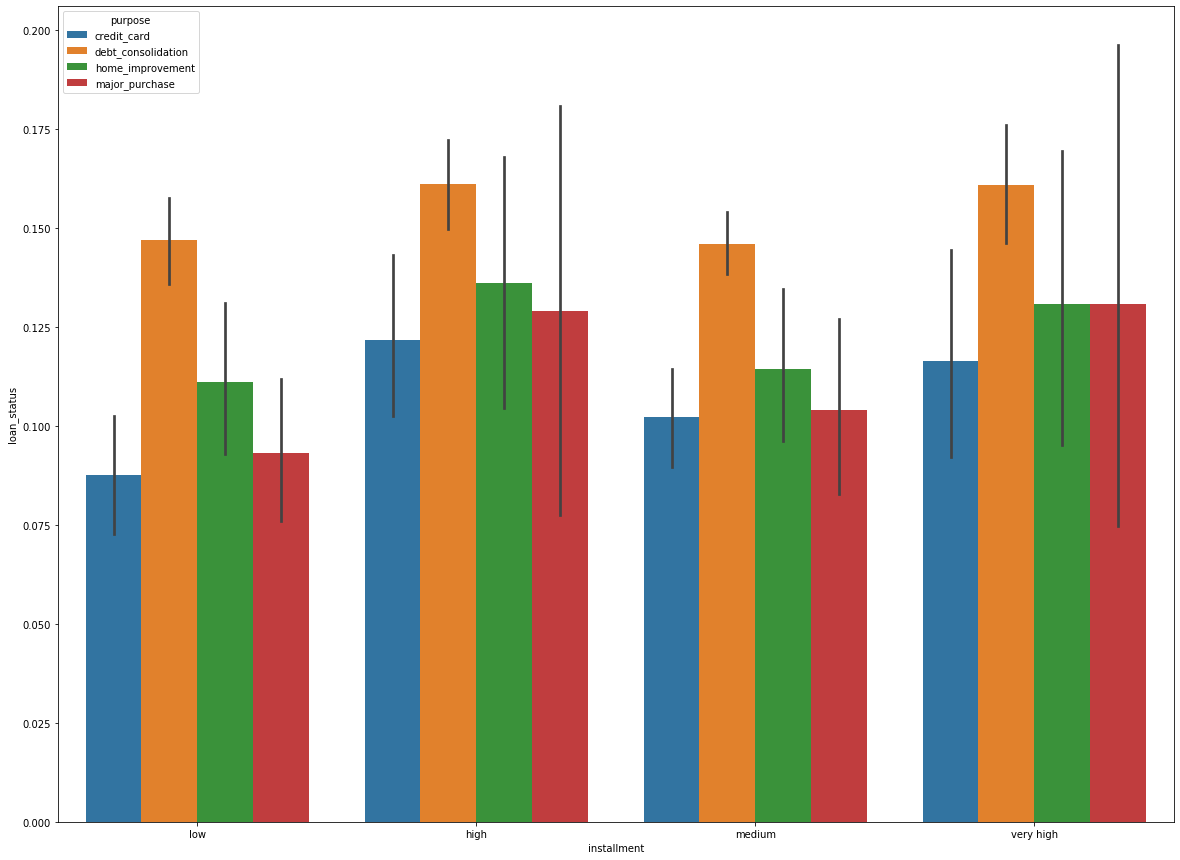

In [89]:
plot_segmented('installment')

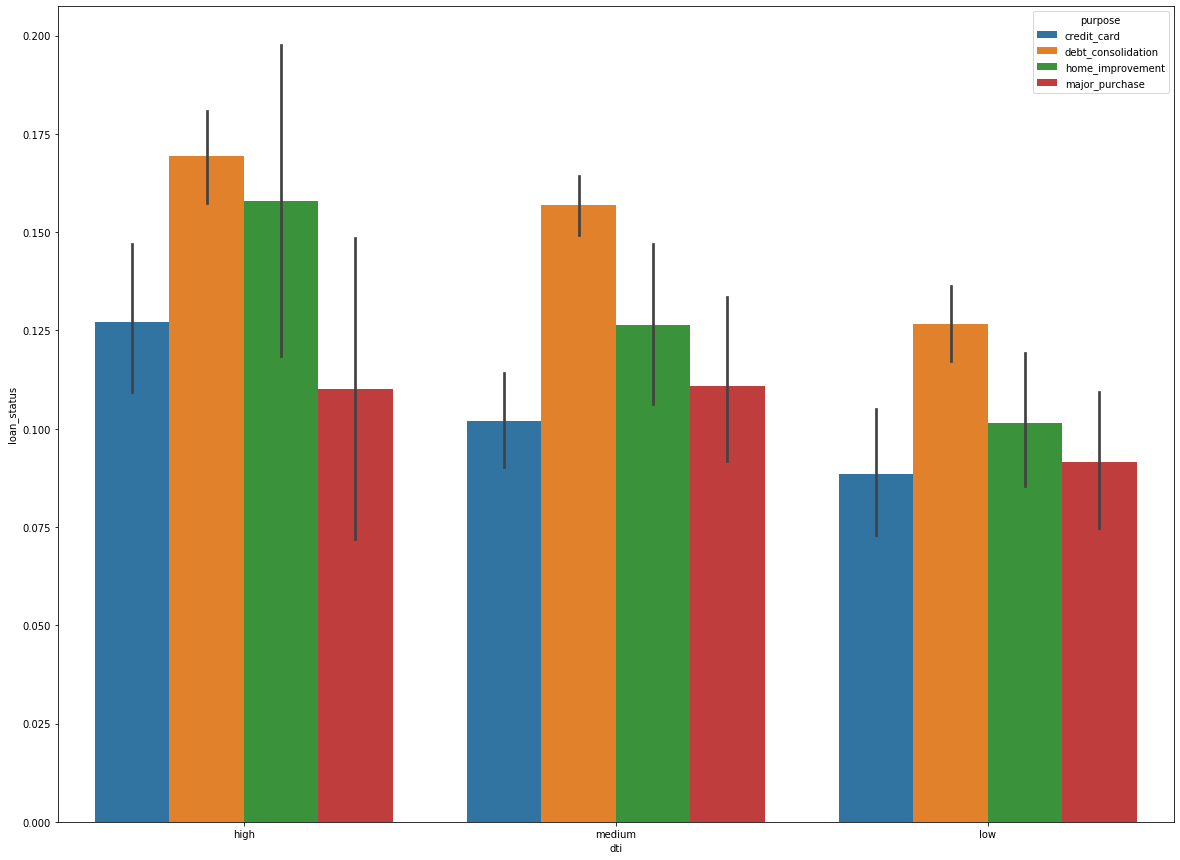

In [90]:
plot_segmented('dti')

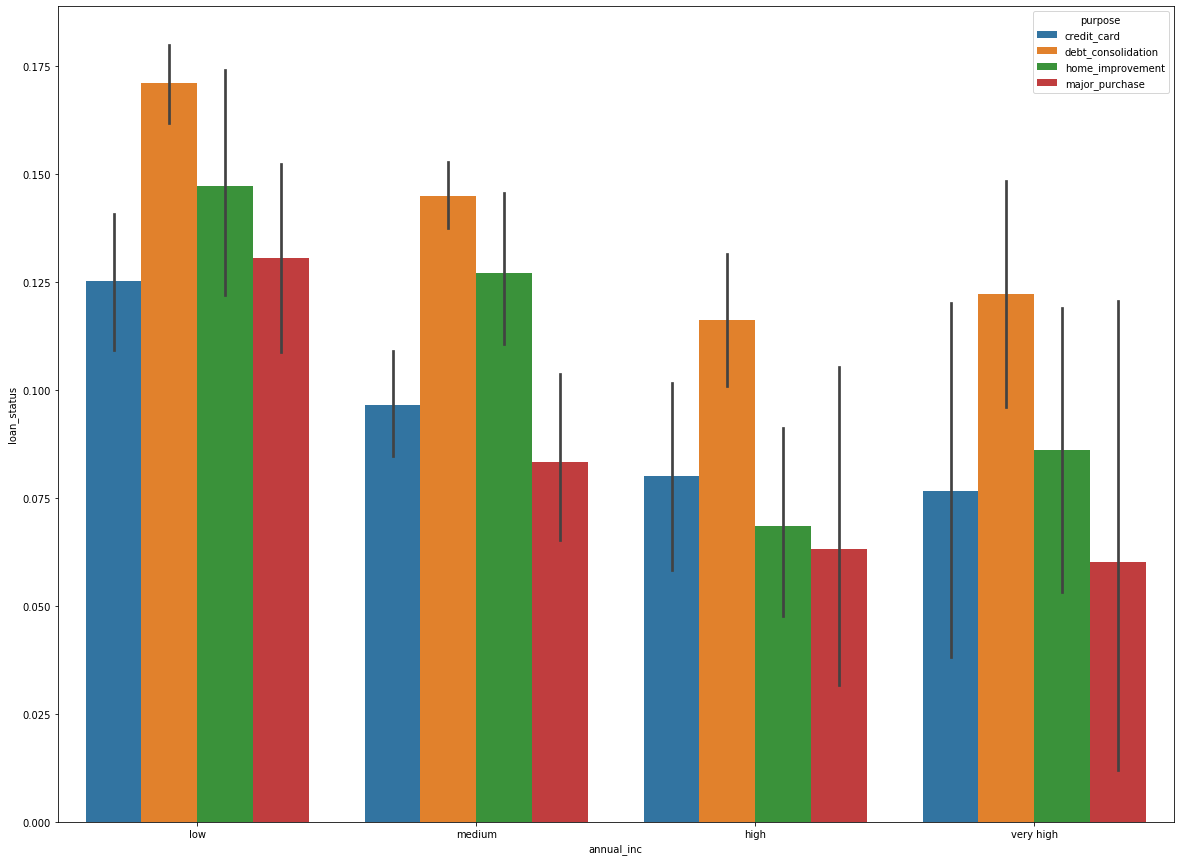

In [91]:
plot_segmented('annual_inc')

A good way to quantify th effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'. 

Let's see an example using annual_inc as the categorical variable.

In [92]:
# variation of default rate across annual_inc
df.groupby('annual_inc').loan_status.mean().sort_values(ascending = False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [93]:
# make a function which takes in a categorical variable and computed the average 
# default rate across the categories
# It can also compute the 'difference between the highest and the lowest default rate' across the 
# categories, which is a decent metric indicating the effect of the varaible on default rate

def diff_rate(var):
    default_rate = df.groupby(var).loan_status.mean().sort_values(ascending = False)
    return (round(default_rate , 2) , round(default_rate[0] - default_rate[-1] , 2))

In [94]:
default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


Thus, there is a 6% increase in default rate as you go from high to low annual income. We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [95]:
# filtering all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in df.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'year', 'month']


In [97]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0}


In [98]:
df_categorical = df.loc[:, df.dtypes == 'object']
df_categorical['loan_status'] = df['loan_status']

print([i for i in df_categorical.columns])
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'loan_status']
{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0}
